# Customer Segmentation for Targeted Marketing

## Dataset Overview

This dataset contains information about 850 customers, capturing their demographic and financial data. The goal is to use this data to perform customer segmentation, which will help in identifying distinct customer groups for more effective targeted marketing.

### Dataset Columns:
- **Customer Id:** Unique identifier for each customer (not needed for segmentation analysis).
- **Age:** Customer's age.
- **Edu (Education level):** Education level of the customer.
- **Years Employed:** Number of years the customer has been employed).
- **Income:** Customer's income.
- **Card Debt:** Debt related to credit cards.
- **Other Debt:** Debt from other sources.
- **Defaulted:** Whether the customer has defaulted on a loan (contains some missing values).
- **Address:** Customer's address code.
- **DebtIncomeRatio:** Ratio of debt to income.

## Objective
To segment customers based on their demographic and financial data, focusing on age, education, income, employment, debt, and debt-to-income ratio. The aim is to identify distinct customer groups for more effective and personalized marketing strategies.

Please [click here](https://www.kaggle.com/datasets/yashgupta011/customer-segmentation-dataset/data) to get the dataset link.


## Import Necessary Libraries
First import all the necessary libraries for data importation, exploration and model Building.

In [407]:
# Import Necessary Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Load the dataset and Exploration

In [408]:
df = pd.read_csv("Segementation Data.csv")

In [409]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2.0,6,19000,124.0,1073.0,0.0,NBA001,6.3
1,2,47,1.0,26,100000,4172.5,4172.5,0.0,NBA021,12.8
2,3,33,2.0,10,57000,4172.5,4172.5,1.0,NBA013,20.9
3,4,29,2.0,4,19000,681.0,516.0,0.0,NBA009,6.3
4,5,47,1.0,31,103375,4172.5,4172.5,0.0,NBA008,7.2


In [410]:
df['Income'].max()

103375

### Understnd the data structure

In [411]:
print(f'The dataset have total {df.shape[0]} rows and {df.shape[1]} columns')

The dataset have total 850 rows and 10 columns


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    float64
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 66.5+ KB


### Summary Statistics
Summary statistics shows central tendency, dispersion and shapre of the distribution

In [413]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.672941,8.565882,43204.558824,1332.212353,2253.340588,0.261429,10.060294
std,245.51816,8.041432,0.834742,6.777884,25092.546851,1231.360792,1376.490039,0.439727,6.374973
min,1.00000,20.000000,1.000000,0.000000,13000.000000,12.000000,46.000000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24000.000000,382.500000,1045.750000,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35000.000000,885.000000,2003.000000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55750.000000,1898.500000,3903.250000,1.000000,13.800000
max,850.00000,56.000000,3.500000,33.000000,103375.000000,4172.500000,4172.500000,1.000000,26.850000


### Handling Missing Values
The Defaulted Columns have 150 missing values

In [414]:
# Check the missing values
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

### Check Unique Value

In [415]:
df.nunique()

Customer Id        850
Age                 37
Edu                  4
Years Employed      33
Income              88
Card Debt          659
Other Debt         602
Defaulted            2
Address             32
DebtIncomeRatio    228
dtype: int64

### Data Wrangling

We will drop Customer Id, Address, and Defaulted columns and duplicated rows from the dataset 

In [416]:
# Remove unnecessary columns
df = df.drop(columns=['Customer Id', 'Address','Defaulted'])

In [417]:
# Remove duplicated rows from the dataset
df = df.drop_duplicates()

In [418]:
data = df.copy()

## Data Visualiztion
Data visualization helps to better understand the distribution of data and to check anamolies. **Histogram** visualize the distrbution of Numberical Features to see their distribution.

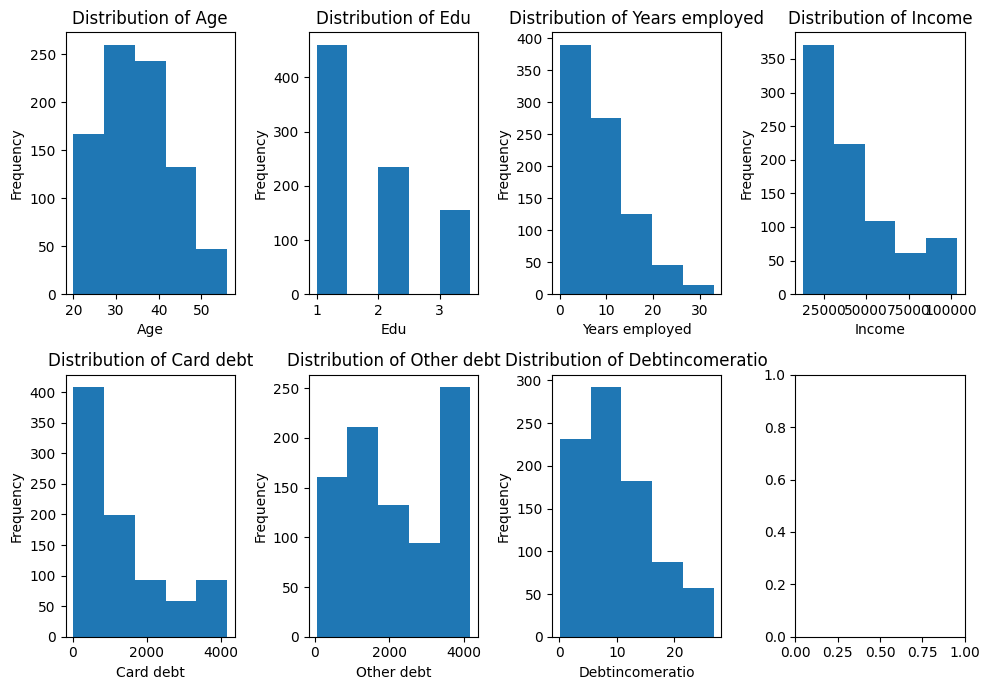

In [419]:
numerical_cols = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt','DebtIncomeRatio']

# Create subplots with 2 columns and 4 rows
fig, axes = plt.subplots(2, 4, figsize=(10, 7))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms
for i, feature in enumerate(numerical_cols):
    ax = axes[i]
    df[feature].hist(bins=5, ax=ax, grid=False)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


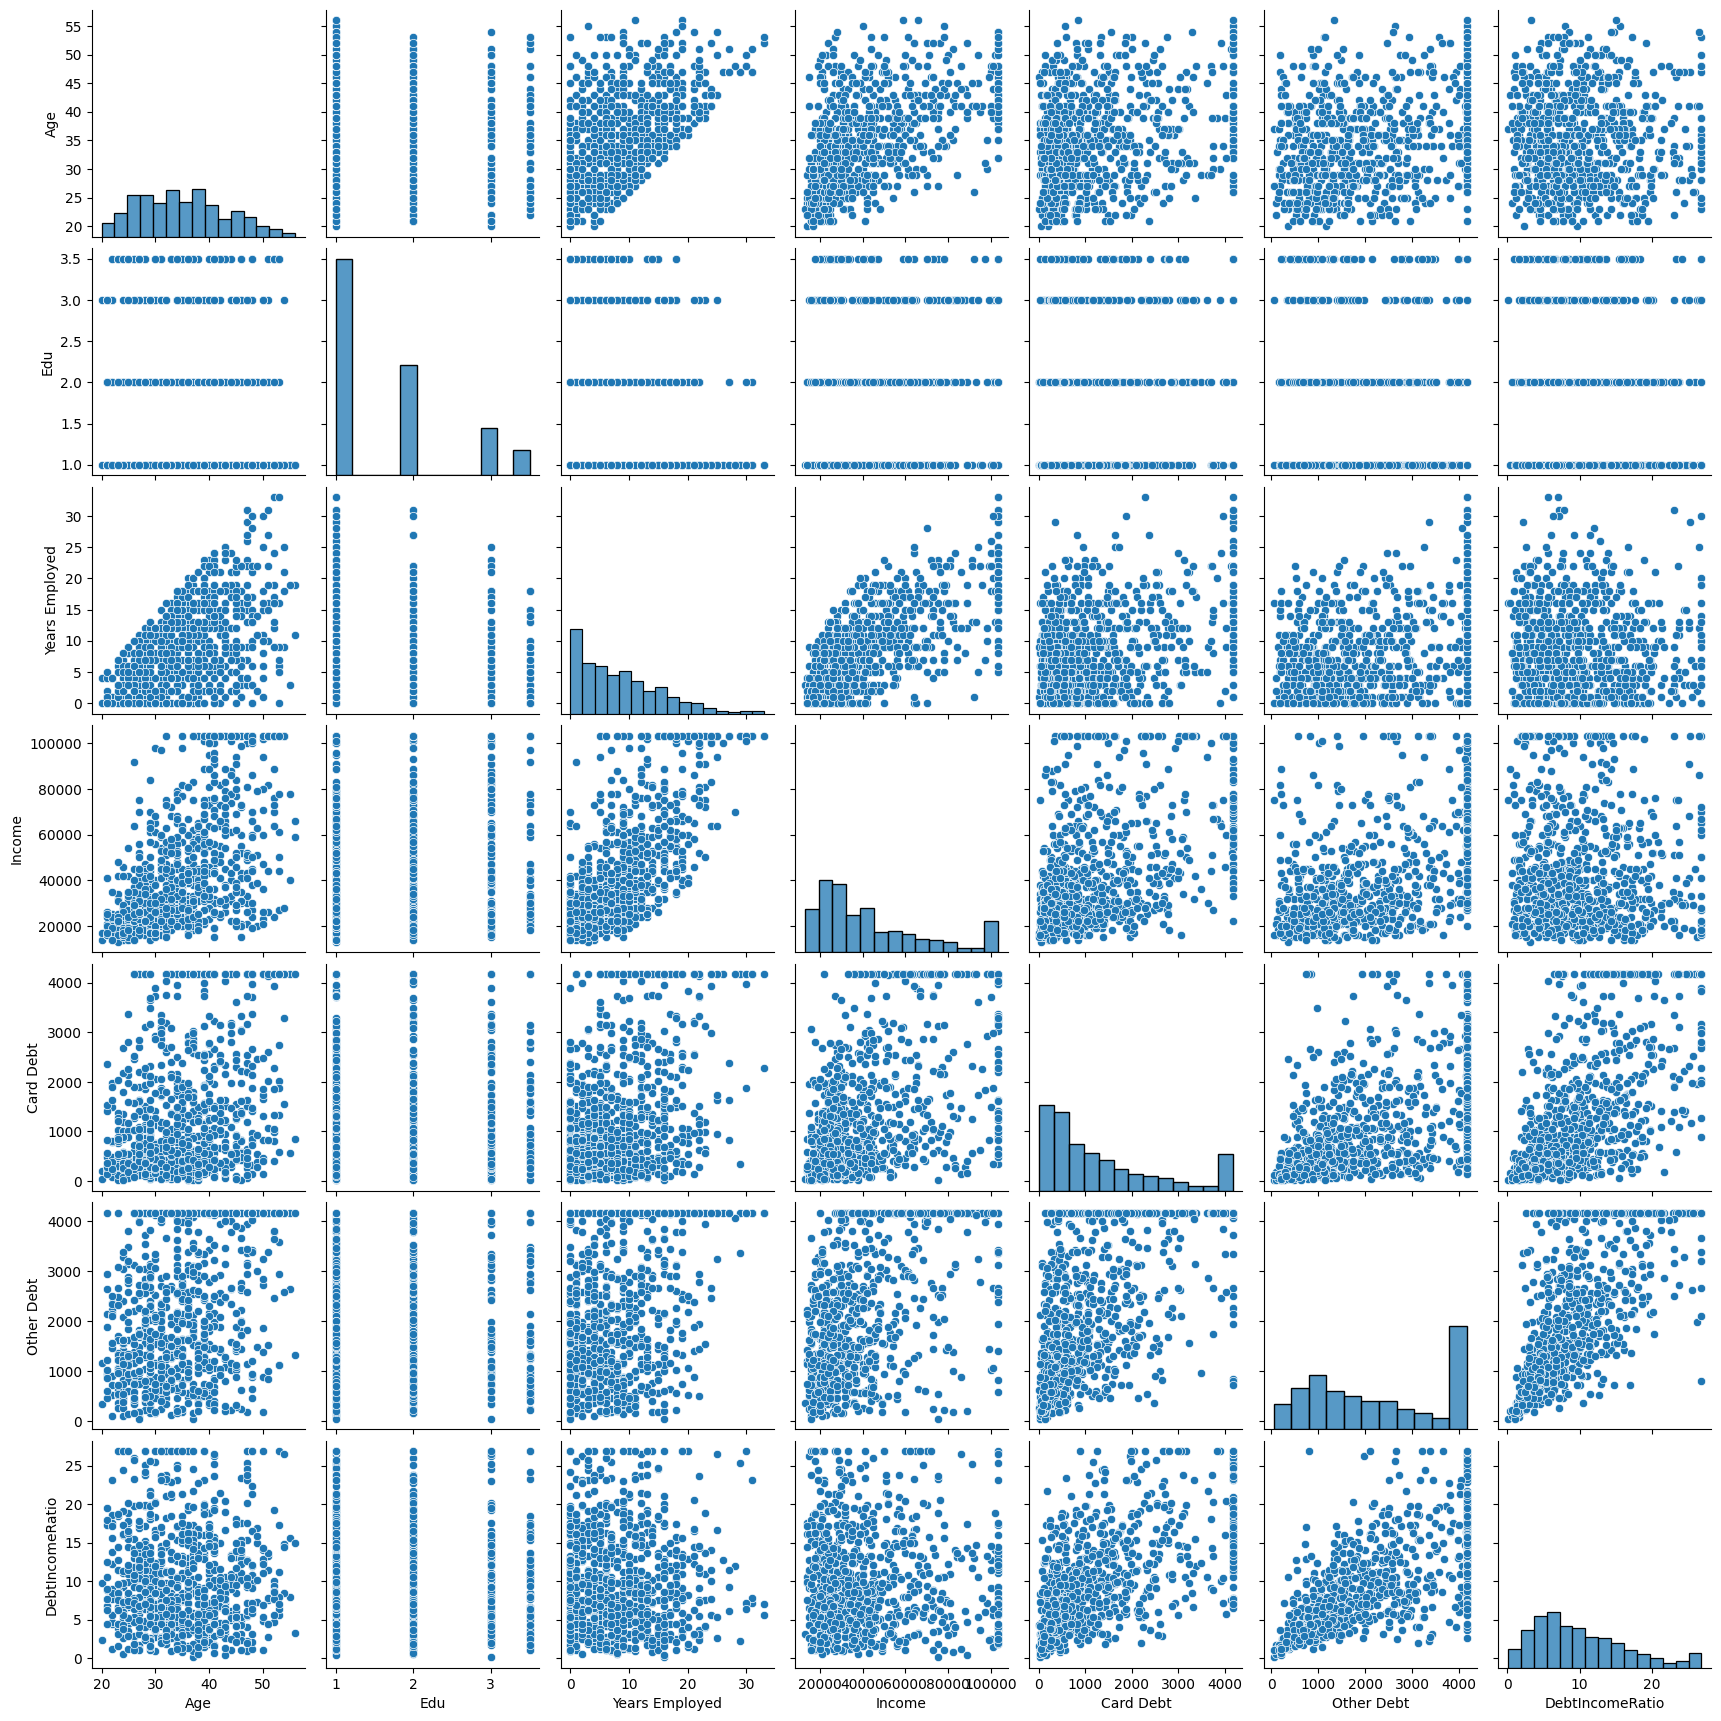

In [420]:
sns.pairplot(df)
plt.show()

### Correlatin Analysis
**Correlation Heatmap** show the correlation between numerical features to identify poteintial relationships

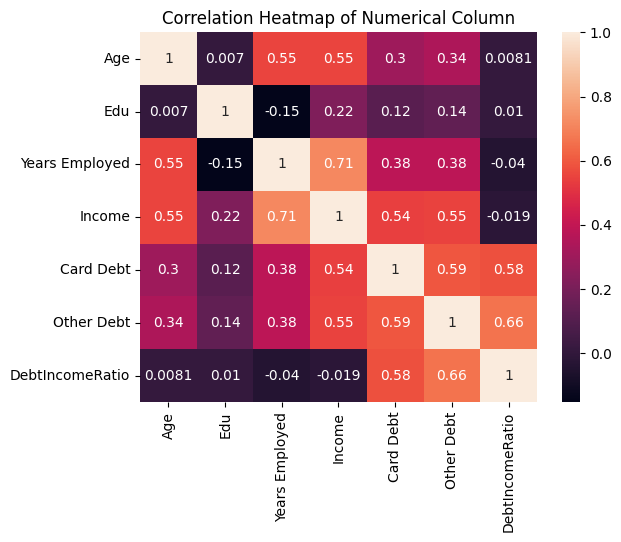

In [421]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap of Numerical Column')
plt.show()

### Scaling Numerical Features

In [422]:
# Columns to scale
numerical_cols = ['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.742915,2.0,-0.378790,-0.965179,-0.981779,-0.858005,-0.590200
1,1.489490,1.0,2.573721,2.264771,2.307983,1.395062,0.430013
2,-0.252518,2.0,0.211712,0.550106,2.307983,1.395062,1.701354
3,-0.750235,2.0,-0.674041,-0.965179,-0.529167,-1.262896,-0.590200
4,1.489490,1.0,3.311849,2.399353,2.307983,1.395062,-0.448940


### Feature Selection

In [423]:
# Feature selection for clustering
features = ['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']

segmentation_data = df[features]

In [424]:
segmentation_data

,Age,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.742915,-0.378790,-0.965179,-0.981779,-0.858005,-0.590200
1,1.489490,2.573721,2.264771,2.307983,1.395062,0.430013
2,-0.252518,0.211712,0.550106,2.307983,1.395062,1.701354
3,-0.750235,-0.674041,-0.965179,-0.529167,-1.262896,-0.590200
4,1.489490,3.311849,2.399353,2.307983,1.395062,-0.448940
...,...,...,...,...,...,...
845,-0.999093,-0.526415,-0.686048,-0.637241,-0.751149,-0.511722
846,-0.874664,-0.231164,-0.367040,-0.790820,-0.168891,-0.480331
847,-1.247951,-1.264543,-1.005055,1.194332,0.695408,2.635241
848,-0.376947,0.506963,-0.606296,-0.988279,-1.132051,-1.123849


## Model Building and Customer Segmentation

### Determine the Optimal Number of Clusters (K)
Use the Elbow method and silhouette score the determine the optimal number of cluster

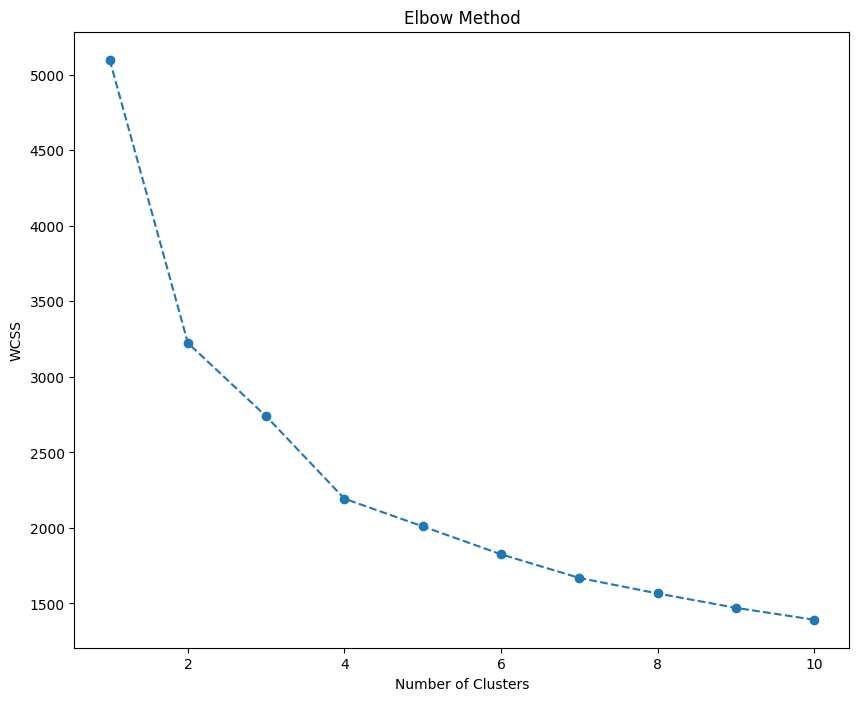

In [425]:
# Determin optimal number of clusters using Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++',random_state=42)
    kmeans.fit(segmentation_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within-cluster Sum of Squares
plt.show()

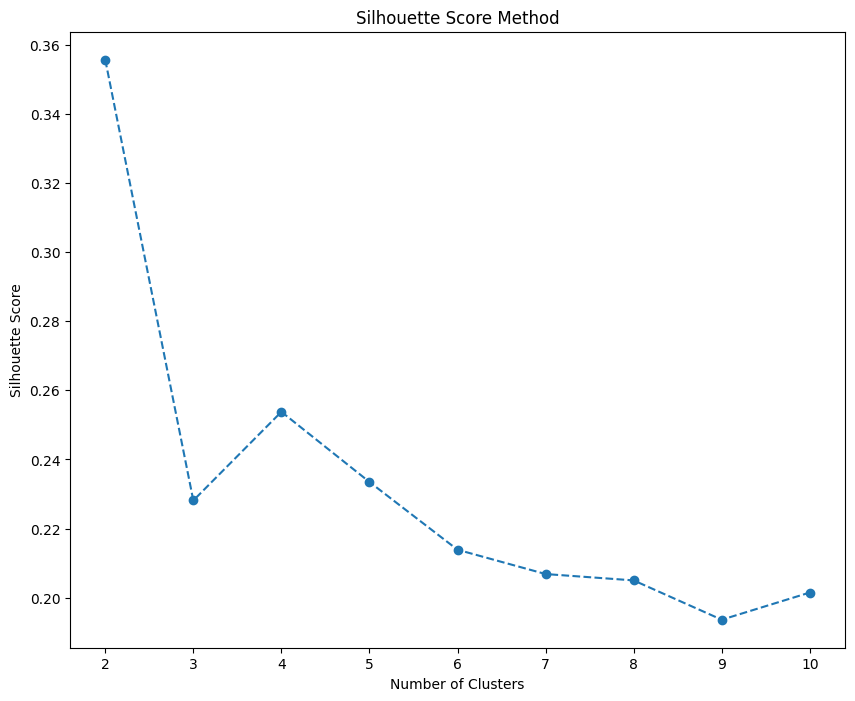

In [426]:
# List to store silhouette scores
silhouette_scores = []

# Loop through the number of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_data)
    
    # Calculate silhouette score
    score = silhouette_score(segmentation_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Graph
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Model Training and Visualization

### Visualize Clustered Segmentation
PCA simplifies customer segmentation by reducing complex data to two or three dimensions, making it easy to visualize clusters. Well-separated clusters show distinct customer groups, while overlaps indicate similarities. This helps identify key features for more targeted marketing strategies.

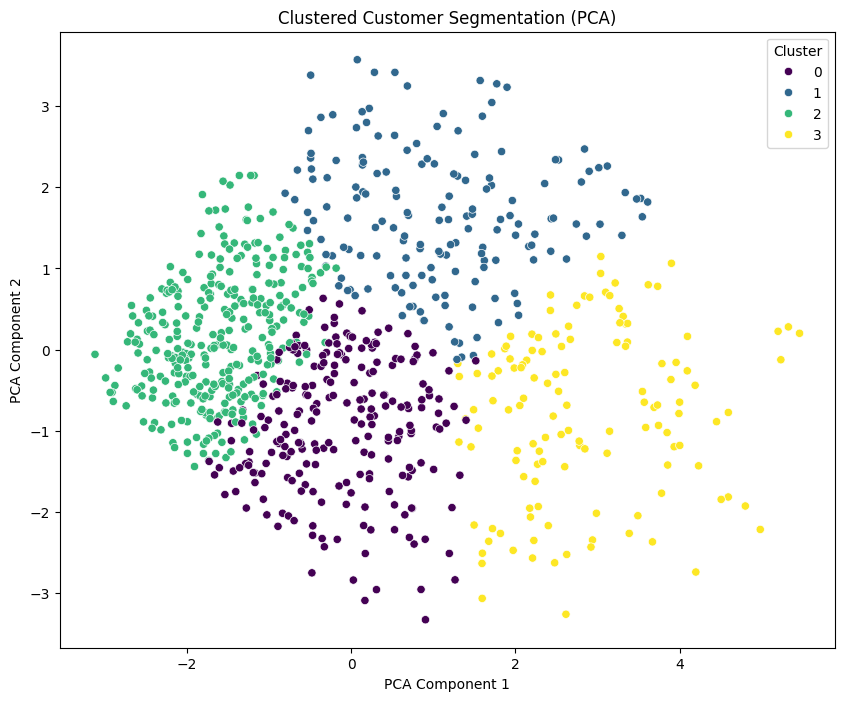

In [427]:
# Perform PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3,random_state=42)
pca_components = pca.fit_transform(segmentation_data)

# Add PCA components to the dataset
segmentation_data['PCA1'] = pca_components[:,0]
segmentation_data['PCA2'] = pca_components[:,1]
segmentation_data['PCA3'] = pca_components[:,2]

# Initiate K-means with 4 clusters
kmeans = KMeans(n_clusters=4,random_state=42)
labels = kmeans.fit_predict(segmentation_data.drop(['PCA1', 'PCA2', 'PCA3'], axis=1))

# Add cluster data to segmentation
segmentation_data['cluster'] = labels
segmentation_data.head()

# Visuailze Cluster based on PCA Components
plt.figure(figsize=(10,8))
sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=segmentation_data,palette='viridis')
plt.title('Clustered Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster',loc='upper right')
plt.show()

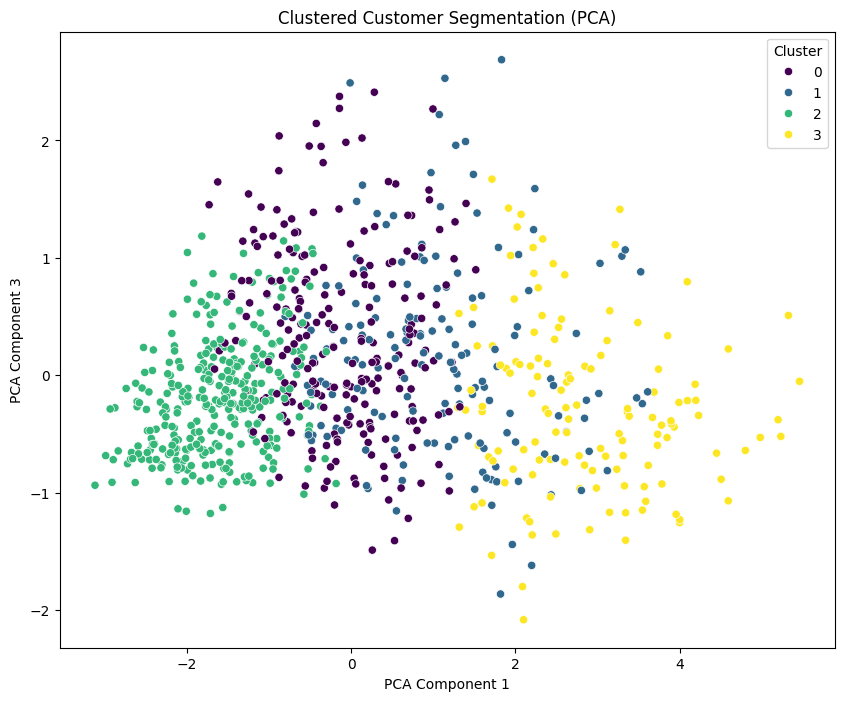

In [428]:
# Visuailze Cluster based on PCA Components
plt.figure(figsize=(10,8))
sns.scatterplot(x='PCA1',y='PCA3',hue='cluster',data=segmentation_data,palette='viridis')
plt.title('Clustered Customer Segmentation (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 3')
plt.legend(title='Cluster',loc='upper right')
plt.show()

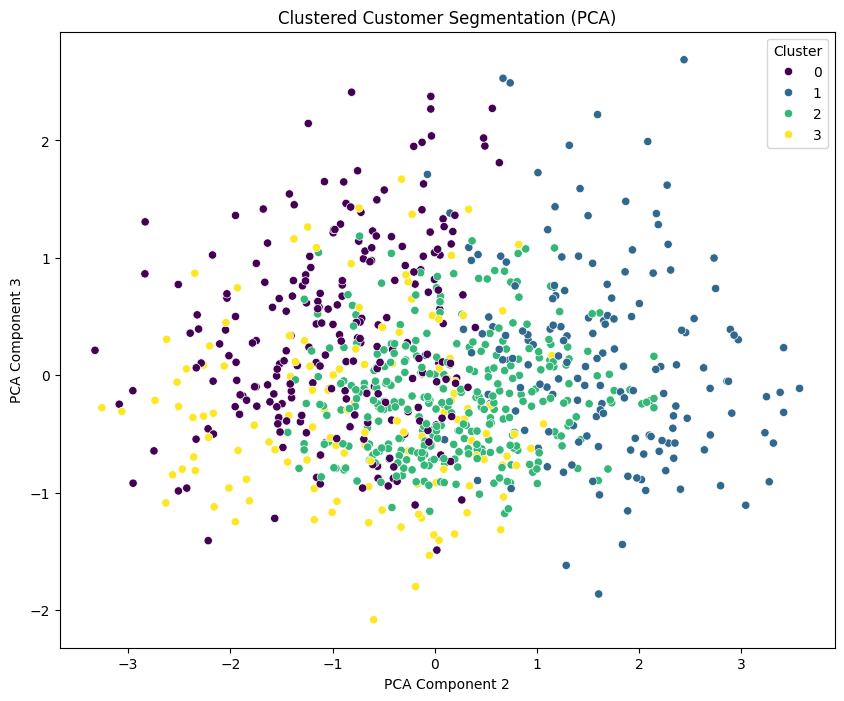

In [429]:
# Visuailze Cluster based on PCA Components
plt.figure(figsize=(10,8))
sns.scatterplot(x='PCA2',y='PCA3',hue='cluster',data=segmentation_data,palette='viridis')
plt.title('Clustered Customer Segmentation (PCA)')
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 3')
plt.legend(title='Cluster',loc='upper right')
plt.show()

### Profile and Intecept Cluster
After clustering, we will profile each segment to understand their unique traits and behaviors.This includes interpreting the cluster centroids and visualizing segment characteristics to gain actionable insights.

In [430]:
label_0 = segmentation_data[segmentation_data['cluster'] == 0]
label_1 = segmentation_data[segmentation_data['cluster'] == 1]
label_2 = segmentation_data[segmentation_data['cluster'] == 2]
label_3 = segmentation_data[segmentation_data['cluster'] == 3]

In [431]:
label_0.shape, label_1.shape, label_2.shape, label_3.shape

((230, 10), (165, 10), (323, 10), (132, 10))

In [432]:
data["Cluster"] = labels

In [433]:
Segment1 = data.loc[(data["Cluster"] == 0)]
Segment2 = data.loc[(data["Cluster"] == 1)]
Segment3 = data.loc[(data["Cluster"] == 2)]
Segment4 = data.loc[(data["Cluster"] == 3)]

In [434]:
Segment1.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster
0,41,2.0,6,19000,124.0,1073.0,6.3,0
6,38,2.0,4,56000,442.0,454.0,1.6,0
7,42,3.0,0,64000,279.0,3945.0,6.6,0
11,34,2.0,9,40000,374.0,266.0,1.6,0
17,43,3.5,1,26000,1519.0,1237.0,10.6,0


In [435]:
Segment2.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster
2,33,2.0,10,57000,4172.5,4172.5,20.9,1
13,46,1.0,6,30000,1415.0,3865.0,17.6,1
21,36,3.0,10,43000,961.0,4172.5,13.0,1
22,28,3.0,6,47000,4172.5,3732.0,19.8,1
27,37,1.0,19,38000,2591.0,2539.0,13.5,1


In [436]:
Segment3.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster
3,29,2.0,4,19000,681.0,516.0,6.3,2
8,26,1.0,5,18000,575.0,2215.0,15.5,2
12,24,1.0,7,18000,526.0,643.0,6.5,2
14,28,3.0,2,20000,233.0,1647.0,9.4,2
15,24,1.0,1,16000,185.0,1287.0,9.2,2


In [437]:
Segment4.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster
1,47,1.0,26,100000,4172.5,4172.5,12.8,3
4,47,1.0,31,103375,4172.5,4172.5,7.2,3
5,40,1.0,23,81000,998.0,4172.5,10.9,3
9,47,3.0,23,103375,653.0,3947.0,4.0,3
10,44,3.0,8,88000,285.0,4172.5,6.1,3


## Business Recommendation

### Cluster Profiling

In [438]:
# Calculate mean values of the features for each cluster
cluster_profile = data.groupby('Cluster').mean()

# Add cluster size to the profile
cluster_profile['size'] = data['Cluster'].value_counts()
cluster_profile

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,size
Cluster,,,,,,,,
0,39.600000,1.565217,10.421739,45066.847826,875.976087,1710.769565,6.323478,230
1,34.272727,1.815152,7.600000,40745.454545,2293.972727,3691.718182,19.284848,165
2,28.547988,1.611455,3.848297,25000.000000,593.845201,1268.902477,7.791331,323
3,43.871212,1.833333,18.083333,87579.545455,2731.731061,3809.647727,10.592803,132


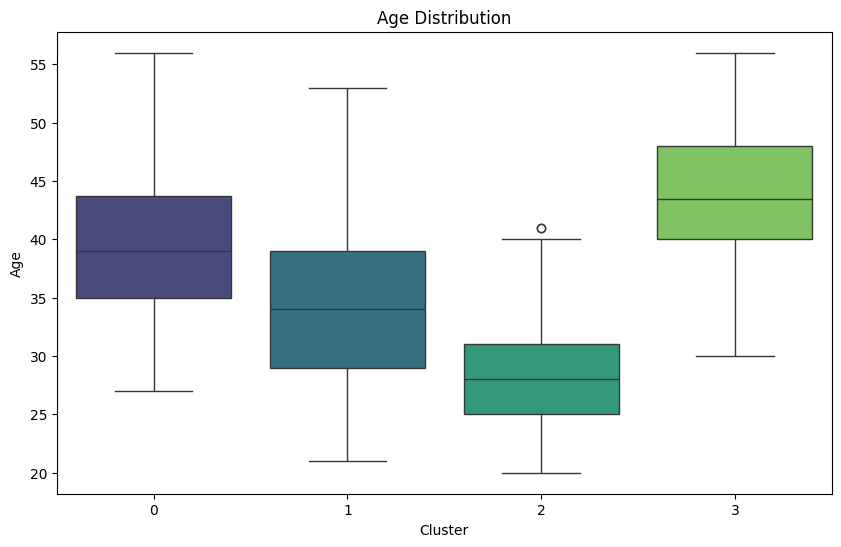

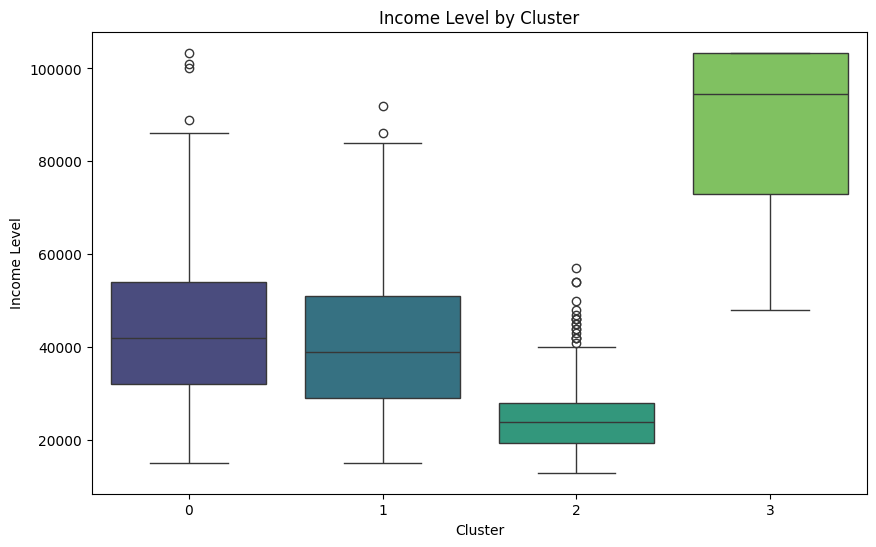

In [439]:
# Visualize Age distribution for each cluster
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster',y='Age',data=data,palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Visualize Income Distribution for each Cluster
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster',y='Income',data=data,palette='viridis')
plt.title('Income Level by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income Level')
plt.show()

## Cluster Analysis Insights

### Segment 1 (Moderate Income, Low Debt)
- **Age**: Average 39.6 years
- **Education**: Moderate (1.57)
- **Years Employed**: Average of 10.42 years
- **Income**: Mid-range at $45,067
- **Debt**: 
  - Low card debt: $875.98 
  - Other debt: $1,710.77
- **Debt-Income Ratio**: 6.32%, indicating manageable debt levels relative to income
- **Size**: 230 members

### Recommendations:
- Offer **savings and investment products** to help this group grow wealth.
- Target with **mid-tier financial products**, such as low-interest personal loans, focusing on their low debt levels.

---

### Segment 2 (Mid-Income, High Debt)
- **Age**: Average 34.27 years
- **Education**: Slightly higher than Cluster 1 (1.82)
- **Years Employed**: Average of 7.6 years
- **Income**: $40,745
- **Debt**: 
  - High card debt: $2,293.97 
  - Other debt: $3,691.72
- **Debt-Income Ratio**: 19.28%, indicating significant financial strain
- **Size**: 165 members

### Recommendations:
- Focus on **debt relief products** such as consolidation or credit counseling services.
- Provide **financial education** on budgeting and debt management.

---

### Segment 3 (Young, Low Income, Low Debt)
- **Age**: Youngest cluster with an average of 28.55 years
- **Education**: Moderate (1.61)
- **Years Employed**: Low at 3.85 years
- **Income**: $25,000, indicating entry-level employment
- **Debt**: 
  - Low card debt: $593.85 
  - Other debt: $1,268.90
- **Debt-Income Ratio**: 7.79%, manageable given their low income
- **Size**: Largest group with 323 members

### Recommendations:
- Offer **entry-level credit products**, like starter credit cards or short-term loans.
- Introduce **financial literacy programs** focused on building credit and managing finances in early careers.

---

### Segment 4 (High Income, High Debt)
- **Age**: Oldest cluster with an average of 43.87 years
- **Education**: High (1.83)
- **Years Employed**: Longest employment history at 18.08 years
- **Income**: Highest at $87,580
- **Debt**: 
  - High card debt: $2,731.73 
  - Other debt: $3,809.65
- **Debt-Income Ratio**: 10.59%, indicating they manage their debt reasonably well given their high income
- **Size**: Smallest group with 132 members

### Recommendations:
- Promote **investment and wealth management products**.
- Offer **personalized high-end financial products**, like retirement planning and asset management services.
- Provide **debt restructuring** for those looking to reduce their debt burden while maintaining their lifestyle.

---

## General Recommendations
- **Targeted Marketing**: Customize marketing strategies for each cluster based on their financial situation. For instance, focus on wealth management and debt consolidation for Segment 4 and financial education for Segment 2.
- **Financial Products**: Create tailored financial products for each group, focusing on debt relief for those with high debt ratios and investment products for those with higher income and manageable debt.